In [2]:
import numpy as np

In [3]:
# fields.shape, target.shape

# fields[4000:4005], target[4000:4050]

# option_prices_dataset.data
# option_prices_dataset.plot()

In [4]:
K_and_L = np.array([(1, 10), (2, 20), 
                    (3, 30), (4, 40), 
                    (5, 50), (6, 60)])
  
K_and_L_indices = np.arange(K_and_L.shape[0])

print(K_and_L_indices)

sampled_indices = np.random.choice(K_and_L_indices, 6, p=[0.1, 0, 0.3, 0.6, 0, 0])

print(sampled_indices)

sampled_K_and_L = K_and_L[sampled_indices]

sampled_K_and_L

[0 1 2 3 4 5]
[3 2 3 2 0 3]


array([[ 4, 40],
       [ 3, 30],
       [ 4, 40],
       [ 3, 30],
       [ 1, 10],
       [ 4, 40]])

In [5]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30]).reshape(1, -1)

a * b.T

array([[10, 20, 30],
       [20, 40, 60],
       [30, 60, 90]])

### Encoder

In [33]:
import struct

In [254]:
def encode_to_binary_str(number):
  
    number_bytes = struct.pack('!f', float(number))
    
    binary_strings = [f"{byte:0>8b}" for byte in number_bytes]
    
    integer_strings = [f"{byte}" for byte in number_bytes]   
    
    binary_string = ''.join(binary_strings)
    
    print("number_bytes:", number_bytes)
    print("binary_strings:", binary_strings)
    print("integer_strings:", integer_strings)
    
    return binary_string

In [345]:
encode_to_binary_str(-5.65)

number_bytes: b'\xc0\xb4\xcc\xcd'
binary_strings: ['11000000', '10110100', '11001100', '11001101']
integer_strings: ['192', '180', '204', '205']


'11000000101101001100110011001101'

In [223]:
### Numpy

In [257]:
# x = np.arange(4., dtype='<f') 

# x = np.array([1], dtype=np.float32)

x = np.array([-1.3], dtype='>f')

In [258]:
x

array([-1.3], dtype=float32)

In [259]:
x.view('uint8')

array([191, 166, 102, 102], dtype=uint8)

In [232]:
x

array([1.], dtype=float32)

In [260]:
y = np.unpackbits(x.view('uint8'))

y

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0], dtype=uint8)

In [311]:
input_byte = np.array([2], dtype='>i1')

input_byte

array([2], dtype=int8)

In [312]:
byte = input_byte.view('uint8')

byte

array([2], dtype=uint8)

In [313]:
bits = np.unpackbits(byte)

bits

array([0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

In [314]:
def encode_to_bits(number, dtype='>f'):
    
    number_bytes = np.array([number], dtype=dtype)
    
    integer_view = number_bytes.view('uint8')
    
    bits = np.unpackbits(integer_view)
    
    print("number:", number)
    print("number_bytes:", number_bytes)
    print("integer_view:", integer_view)
    print("bits:", bits)
    
    return bits  

In [333]:
encode_to_bits(-1.4546, dtype='<f8')

number: -1.4546
number_bytes: [-1.4546]
integer_view: [131  47  76 166  10  70 247 191]
bits: [1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1]


array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [344]:
encode_to_bits(-5.65)

number: -5.65
number_bytes: [-5.65]
integer_view: [192 180 204 205]
bits: [1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 0 1]


array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=uint8)

### Combinations

In [ ]:
volatilities = np.linspace(0, 1.0, 101)
initial_stock_prices = np.linspace(0, 10000, 101)

combinations = np.array(np.meshgrid(initial_stock_prices, volatilities)).T.reshape(-1, 2)

### Reverse Dataset

In [ ]:
import tqdm
import pandas as pd

OPTION_PROBABILITIES_PATH = 'simulated_prices/complete_option_probabilities_100M.csv'
REVERSED_OPTION_PROBABILITIES_PATH = 'simulated_prices/reversed_option_probabilities_100M.csv'

dataset_size = 101 * 101 * 10000
chunk_size = 10000

chunks_count = dataset_size // chunk_size

dataset_iterator = pd.read_csv(OPTION_PROBABILITIES_PATH, iterator=True, chunksize=chunk_size)

chunk_tracker = tqdm.tqdm(range(chunks_count),
                          desc=f"Loading",
                          ncols=110,
                          unit='chunk',
                          total=chunks_count)

chunks = []

for chunk_index in chunk_tracker:
    
    chunk = next(dataset_iterator)
    
    chunks.append(chunk)
    

dataframe = pd.concat(chunks)

In [ ]:
reversed_datafame = dataframe[::-1]

In [ ]:
reversed_datafame.to_csv(REVERSED_OPTION_PROBABILITIES_PATH, index=False)

In [ ]:
reversed_dataset_iterator = pd.read_csv(REVERSED_OPTION_PROBABILITIES_PATH, iterator=True, chunksize=10)

next(reversed_dataset_iterator)

In [ ]:
# CSV

import csv

with open(OPTION_PROBABILITIES_PATH) as fr, open(REVERSED_OPTION_PROBABILITIES_PATH, 'w+') as fw:

    cr = csv.reader(fr, delimiter=",")
    cw = csv.writer(fw, delimiter=",")
    
    cw.writerow(next(cr))  # write title as-is
    cw.writerows(reversed(list(cr)))

### Plot

In [5]:
import numpy as np
import matplotlib.pyplot as plt

random_generator = np.random.default_rng()

factorization_matrix = random_generator.integers(0, 10, size=(6, 2))

In [7]:
plt.matshow(factorization_matrix, cmap="hot")
plt.axis('off');

### Tutorial Sampling

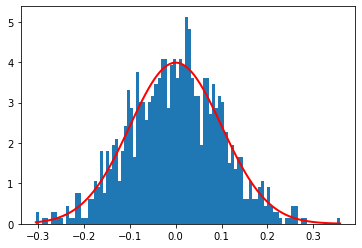

In [1]:
### Tutorial Sampling

import numpy as np

import matplotlib.pyplot as plt


# Parameters

samples_count = 1000
bins_count = 100

mu = mean = 0
sigma = std = 0.1


# Calculate

samples = np.random.normal(mu, sigma, samples_count)

mean_innacuracy = abs(mu - np.mean(samples))
variance_innacuracy = abs(sigma - np.std(samples, ddof=1))


# Plot

count, bins, ignored = plt.hist(samples, bins_count, density=True)

theoretical_ys = 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp( -(bins - mu)**2 / (2 * sigma**2) )

plt.plot(bins, theoretical_ys, linewidth=2, color='r')
plt.show()